# Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df_res = pd.read_csv(FILENAME)
df_res.columns

Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [2]:
from sklearn.model_selection import train_test_split

def my_train_test():
    X = df_res.iloc[:, 1:]
    y = df_res[["Year"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

def my_train_validation_test():
    X = df_res.iloc[:, 1:]
    y = df_res[["Year"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    return(X_train, X_val, y_train, y_val, X_test, y_test)

In [3]:
X_train, X_test, y_train, y_test = my_train_test()

# Show Data Distribution

In [4]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

# Pre-processing

In [5]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [6]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized

    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

def min_max_sc(X_val = None):
    #MinMax Scaling
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train_minmax = min_max_scaler.transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    if X_val is not None:
        X_val_minmax = min_max_scaler.transform(X_val)
        return (X_train_minmax, X_test_minmax, X_val_minmax)
    else:
        return (X_train_minmax, X_test_minmax)

def standardization(X_val = None):
    #Standardization
    scaler = preprocessing.StandardScaler()
    #Addestramento
    scaler.fit(X_train)
    #Applicazione
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if X_val is not None:
        X_val_scaled = scaler.transform(X_val)
        return (X_train_scaled, X_test_scaled, X_val_scaled)
    else:
        return (X_train_scaled, X_test_scaled)

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [7]:
X_train_minmax, X_test_minmax = min_max_sc()
X_train_scaled, X_test_scaled = standardization()

PCA

In [8]:
from sklearn.decomposition import PCA

def f_pca(num_components = None, X_val_scaled = None):
    if num_components is not None:
        pca = PCA(n_components=num_components)
    else: pca = PCA()
    principals_components_train = pca.fit_transform(X_train_scaled)

    # Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
    principals_components_test = pca.transform(X_test_scaled)

    #loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
    #print(loadings)
    if X_val_scaled is not None:
        principals_components_val = pca.transform(X_val_scaled)
        return (principals_components_train, principals_components_test, principals_components_val, pca)
    else:
        return (principals_components_train, principals_components_test, pca)

In [9]:
principals_components_train, principals_components_test, pca = f_pca(54)

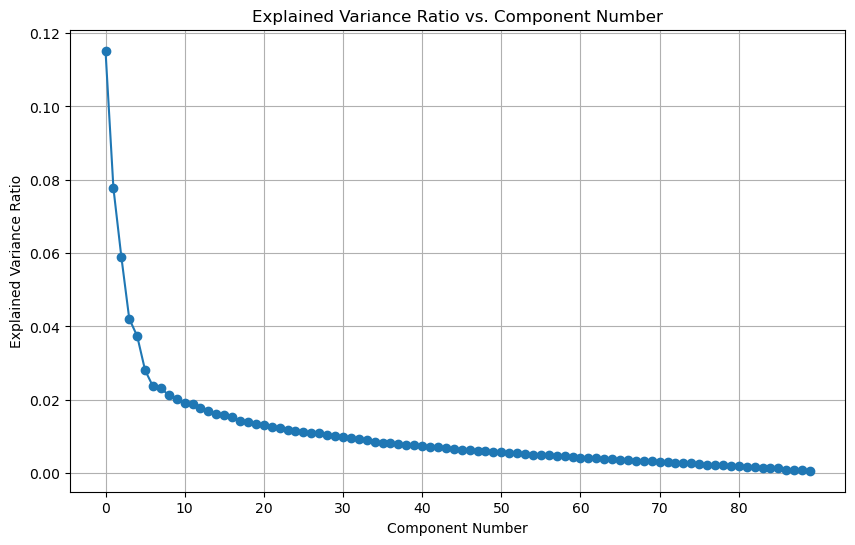

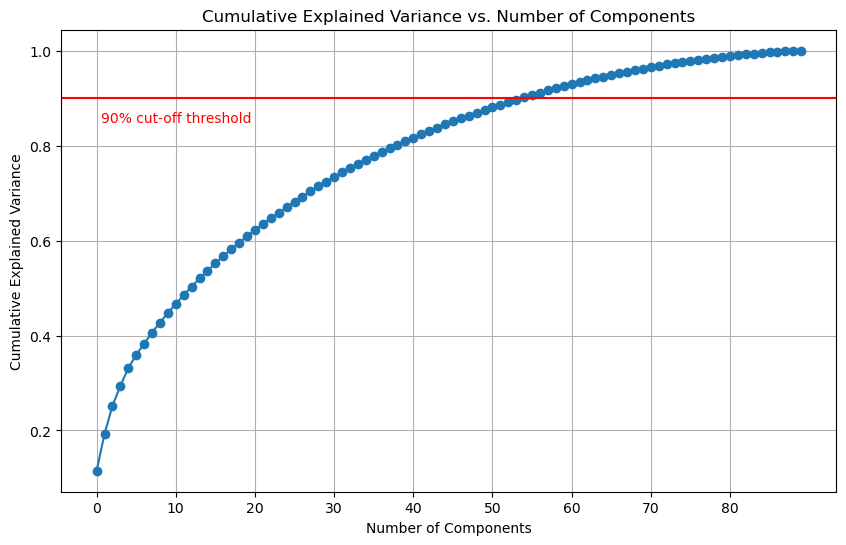

In [10]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_num_components(X_train_scaled):
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot della explained variance ratio per ogni componente
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Component Number')
    plt.grid(True)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

    # Plot della cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.axhline(y=0.9, color='red', linestyle='-')
    plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

# Usa questa funzione per trovare il numero ottimale di componenti principali
find_optimal_num_components(X_train_scaled)


In [11]:
# # Calcola la media dei valori assoluti dei carichi per ciascun componente principale
# mean_abs_loadings = loadings.abs().mean()

# # Ordina i carichi in ordine decrescente di importanza
# sorted_loadings = mean_abs_loadings.sort_values(ascending=False)

# print("Componenti Principali più importanti:")
# print(sorted_loadings)


In [12]:
# # Calcola gli autovalori dall'oggetto PCA
# eigenvalues = pca.explained_variance_

# # Visualizza gli autovalori
# print("Autovalori dei Componenti Principali:")
# for i, eig in enumerate(eigenvalues, 1):
#     print(f"PC{i}: {eig}")

# # Puoi anche visualizzarli in un grafico a barre per una migliore comprensione della distribuzione
# plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
# plt.xlabel('Componente Principale')
# plt.ylabel('Autovalore')
# plt.title('Autovalori dei Componenti Principali')
# plt.show()

In [13]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Considerando che principals_components è un array numpy con tre colonne
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Estraiamo le colonne per l'asse x, y e z
# x = principals_components_train[:, 0]
# y = principals_components_train[:, 1]
# z = principals_components_train[:, 2]

# # Plot dello scatter tridimensionale
# ax.scatter(x, y, z, c=y_train['Year'], marker='o')

# # Etichette degli assi
# ax.set_xlabel('Componente Principale 1')
# ax.set_ylabel('Componente Principale 2')
# ax.set_zlabel('Componente Principale 3')

# plt.title('Scatter Plot dei Componenti Principali')
# plt.show()


In [14]:
# # Set a threshold for which features to extract
# threshold = 0.3

# # Find features with loadings above the threshold for each principal component
# important_features = {}
# for column in loadings.columns:
#     important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# # Now 'important_features' dictionary contains the important features for each PC
# for pc, features in important_features.items():
#     print(f"{pc}: {', '.join(features)}")

# Modeling

Linear-Regressor

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def linearReg(X_train, y_train, X_test, y_test):
    #Linear-Regressor
    reg = LinearRegression().fit(X_train, y_train)

    predizioni = reg.predict(X_test)

    mse = mean_squared_error(y_test, predizioni)
    print("Mean Squared Error (MSE):", mse)

    r_squared = r2_score(y_test, predizioni)
    print("Coefficienti di determinazione R²:", r_squared)

    mae = mean_absolute_error(y_test, predizioni)
    print("Mean Absolute Error (MAE):", mae)
    
    mape = mean_absolute_percentage_error(y_test,predizioni)
    print("Mean Absolute Percentage Error (MAPE):", mape)


In [115]:
linearReg(X_train, y_train, X_test, y_test)
linearReg(X_train_minmax, y_train, X_test_minmax, y_test)
linearReg(X_train_scaled, y_train, X_test_scaled, y_test)
linearReg(principals_components_train, y_train, principals_components_test, y_test)

Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Absolute Error (MAE): 6.611215120501465
Mean Absolute Percentage Error (MAPE): 0.0033183173045255956
Mean Squared Error (MSE): 84.06098943629038
Coefficienti di determinazione R²: 0.23054233709618777
Mean Absolute Error (MAE): 6.611215120501474
Mean Absolute Percentage Error (MAPE): 0.0033183173045256004
Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Absolute Error (MAE): 6.611215120501461
Mean Absolute Percentage Error (MAPE): 0.0033183173045255934
Mean Squared Error (MSE): 95.68428398036981
Coefficienti di determinazione R²: 0.12414776435673236
Mean Absolute Error (MAE): 7.314326675781882
Mean Absolute Percentage Error (MAPE): 0.0036709825649563622


Random-Forest-Regressor

In [ ]:
X_train, X_val, y_train, y_val, X_test, y_test = my_train_validation_test()
X_train_scaled, X_test_scaled, X_val_scaled = standardization(X_val)
principals_components_train, principals_components_test, principals_components_val, pca = f_pca(55, X_val_scaled)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def randomForest(X_train, y_train, X_test, y_test, n_alberi):
    rf_regressor = RandomForestRegressor(n_estimators=n_alberi, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_predictions = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, rf_predictions)
    r_squared = r2_score(y_test, rf_predictions)

    print("Mean Squared Error (MSE):", mse)
    print("Coefficienti di determinazione R²:", r_squared)

In [ ]:
# randomForest(principals_components_train, y_train, principals_components_test, y_test, 100)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# n_estimators_values = [10, 50, 100, 200, 300]
# mse_values = []

# for n_estimators in n_estimators_values:
#     modello_random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
#     modello_random_forest.fit(X_train, y_train)
    
#     predizioni_val = modello_random_forest.predict(X_val)
    
#     mse_val = mean_squared_error(y_val, predizioni_val)
    
#     mse_values.append(mse_val)

# # Plot dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
# plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
# plt.xlabel('Numero di alberi')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR

def svr(num_fold, X_train, y_train, X_test, y_test):
    # Definisci la griglia dei parametri da testare
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 10, 50, 100]
    }

    # Inizializza il regressore SVM
    svm_regressor = SVR()

    # Definisci il numero di fold per la cross-validation
    num_folds = num_fold

    # Inizializza il KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Crea un oggetto GridSearchCV per trovare i migliori parametri con la k-fold cross-validation
    grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

    # Esegui la cross-validation per trovare i migliori parametri
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri trovati
    print("Migliori parametri:", grid_search.best_params_)

    # Valuta il modello con la migliore combinazione di parametri
    best_svm_regressor = grid_search.best_estimator_

    # Valuta il modello sui dati di test
    y_pred = best_svm_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)

In [ ]:
# svr(5, principals_components_train, y_train, principals_components_test, y_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
def knn(num_neig, X_train, y_train, X_test, y_test):
    neig = KNeighborsRegressor(n_neighbors=num_neig)
    neig.fit(X_train, y_train)
    y_pred = neig.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)
    r_squared = r2_score(y_test, y_pred)
    print("Coefficienti di determinazione R²:", r_squared)


In [ ]:
def knn_cv(X_train, y_train, X_val, y_val):
    # Definisci il range di iperparametri per il numero di vicini
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Inizializza il KNN Regressor
    knn = KNeighborsRegressor()

    # Inizializza la ricerca grid
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Estrai i risultati della ricerca grid
    train_scores_mse = np.sqrt(-grid_search.cv_results_['mean_train_score'])  # Mean Squared Error sul train set
    test_scores_mse = np.sqrt(-grid_search.cv_results_['mean_test_score'])  # Mean Squared Error sul test set

    # Inizializza la ricerca grid per MAE
    grid_search_mae = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
    grid_search_mae.fit(X_train, y_train)

    train_scores_mae = -grid_search_mae.cv_results_['mean_train_score']  # Mean Absolute Error sul train set
    test_scores_mae = -grid_search_mae.cv_results_['mean_test_score']  # Mean Absolute Error sul test set

    neighbors = param_grid['n_neighbors'] # Numero di vicini

    # Plot dell'ampliamento dell'errore al variare del numero di vicini
    plt.figure(figsize=(10, 6))
    #plt.plot(neighbors, train_scores, label='Train Error', marker='o')
    plt.plot(neighbors, test_scores_mae, label='Validation Error', marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('MAE')
    plt.title('KNN Regression - Validation Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Trova il miglior modello
    best_neighbor = grid_search.best_params_['n_neighbors']
    best_model = grid_search.best_estimator_

    # Valida il miglior modello sul validation set
    y_pred_val = best_model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r_squared_val = r2_score(y_val, y_pred_val)

    print("Miglior numero di vicini:", best_neighbor)
    print("Mean Squared Error sui dati di validation:", mse_val)
    print("Coefficienti di determinazione R² sui dati di validation:", r_squared_val)

In [ ]:
knn_cv(principals_components_train, y_train, principals_components_val, y_val)

Feed-Forward

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def prepare_data(X_train, y_train, X_val, y_val):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

    return train_dataset, val_dataset

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            #loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def evaluate_model(model, val_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            targets.extend(labels.numpy())
    predictions = np.array(predictions)
    targets = np.array(targets)
    mse = mean_squared_error(targets, predictions)
    r2 = r2_score(targets, predictions)
    return mse, r2

In [ ]:
# Preparazione dei dati
train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definizione del modello
input_size = principals_components_train.shape[1]
hidden_size = 200
num_classes = 1
model = FeedForward(input_size, hidden_size, num_classes)

# Definizione della loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 10
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Valutazione del modello
mse, r2 = evaluate_model(model, val_loader)
print("Mean Squared Error sui dati di validation:", mse)
print("Coefficienti di determinazione R² sui dati di validation:", r2)


In [ ]:
class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth=1):
        super(FeedForwardPlus, self).__init__()
        
        model = [
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        for i in range(depth):
            model += block
            print("i = ", i)

        
        self.model = nn.Sequential(*model)
        
        self.output = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out

In [ ]:
# Preparazione dei dati
train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definizione del modello
input_size = principals_components_train.shape[1]
hidden_size = 800
num_classes = 1
depth = 1

model = FeedForwardPlus(input_size, hidden_size, num_classes, depth)

# Definizione della loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 7
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Valutazione del modello
mse, r2 = evaluate_model(model, val_loader)
print(") Mean Squared Error sui dati di validation:", mse)
print(") Coefficienti di determinazione R² sui dati di validation:", r2)

Modelli deep per Tabular Data:
# TabNet

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
kf = KFold(n_splits=5,random_state=42,shuffle=True)
predictions_array = []
CV_score = []



regressor = TabNetRegressor(verbose=0, seed=42)
regressor.fit(X_train=X_train,y_train=y_train,
    eval_set=[(X_val,y_val)],
    patience = 400,max_epochs=200,
    eval_metric = ['mse'])
CV_score.append(regressor.best_cost)
predictions_array.append(np.expm1(regressor.predict(X_test)))

predictions = np.mean(predictions_array,axis=0)


In [ ]:
print("score: %.5f" % np.mean(CV_score,axis=0))
print(CV_score)


# TabTrasformer

In [15]:
from pytorch_tabular import TabularModel
from pytorch_tabular.categorical_encoders import CategoricalEmbeddingTransformer
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models import TabTransformerConfig

def test_regression(
    regression_data,
    multi_target,
    continuous_cols,
    categorical_cols,
    continuous_feature_transform,
    normalize_continuous_features,
    target_range,
    epoch = 10,
    batch_size = 500
):
    (train, test, target) = regression_data
    data_config = DataConfig(
        target=target + ["MedInc"] if multi_target else target,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
        continuous_feature_transform=continuous_feature_transform,
        normalize_continuous_features=normalize_continuous_features
    )
    model_config_params = {
        "task": "regression",
        "input_embed_dim": 8,
        "num_attn_blocks": 1,
        "num_heads": 2,
        "metrics":["mean_absolute_percentage_error","mean_absolute_error","r2_score"]
    }
    if target_range:
        _target_range = []
        for target in data_config.target:
            _target_range.append(
                (
                    float(train[target].min()),
                    float(train[target].max()),
                )
            )
        model_config_params["target_range"] = _target_range
    model_config = TabTransformerConfig(**model_config_params)
    trainer_config = TrainerConfig(
        max_epochs= epoch,
        checkpoints=None,
        early_stopping=None,
        accelerator="cpu",
        fast_dev_run=False,
        batch_size= batch_size
    )
    optimizer_config = OptimizerConfig()

    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    #print(train[53])
    tabular_model.fit(train=train)

    result = tabular_model.evaluate(test)
    #assert "test_mean_squared_error" in result[0].keys()
    pred_df = tabular_model.predict(test)
    assert pred_df.shape[0] == test.shape[0]
    return result

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c1017RegisterOperatorsD1Ev)
  Referenced from: '/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [16]:
ref_df_train = pd.DataFrame(principals_components_train)
ref_df_test = pd.DataFrame(principals_components_test)

ref_df_train.columns = ref_df_train.columns.astype(str)
ref_df_test.columns = ref_df_test.columns.astype(str)

lista = list(ref_df_train.columns)
lista_target_range = list(range(1900, 2024))

target_column = str(ref_df_train.columns[-1])

In [45]:
res = test_regression(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
    continuous_cols = lista,
    categorical_cols = [],
    continuous_feature_transform = None,
    normalize_continuous_features = False,
    target_range=True, batch_size= 500, epoch=1)

2024-06-28 20:25:52,589 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-06-28 20:25:52,623 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-06-28 20:25:52,695 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-06-28 20:25:52,771 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-06-28 20:25:52,806 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


2024-06-28 20:25:52,835 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.4 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │     55 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector
.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value
of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=1` reached.


2024-06-28 20:26:01,624 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-06-28 20:26:01,636 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.3747016191482544          │
│      test_mean_absolute_error       │         0.8322371244430542          │
│ test_mean_absolute_percentage_error │          36.39686965942383          │
│            test_r2_score            │         -1.9575883150100708         │
└─────────────────────────────────────┴─────────────────────────────────────┘

## Valutazione tabtransformer

In [ ]:
def hyperparameter(batch_size, epochs):
    result = test_regression(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
        continuous_cols = lista,
        categorical_cols = [],
        continuous_feature_transform = None,
        normalize_continuous_features = False,
        target_range=True,
        batch_size=batch_size,
        epoch=epochs )
    return result

### single core

In [ ]:
epochs = list(range(5,10,1))
batch_size = list(range(100,500,100))
results = []
for j,batch in enumerate(batch_size):
    for i,epoch in enumerate(epochs):
        result = test_regression(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
            continuous_cols = lista,
            categorical_cols = [],
            continuous_feature_transform = None,
            normalize_continuous_features = False,
            target_range=True,
            batch_size=batch,epoch=epoch )
        result[0]["batch_size"] = batch
        result[0]["epochs"] = epoch
        results.append(result)
        print("batch_size: %d / %d      epoch: %d / %d"%(j,(len(batch_size)-1),i,(len(epochs)-1)))

In [57]:
#results = results[0]

In [72]:
type(results[0][0])

dict

In [79]:
list_dict = [item[0] for item in results]

In [81]:
df_res =pd.DataFrame(list_dict)
df_res.to_csv("./df_Res.csv")

In [111]:
df_res.sort_values(["epochs","batch_size"])

,test_loss,test_mean_absolute_percentage_error,test_mean_absolute_error,test_r2_score,batch_size,epochs
0,0.003356,0.597829,0.032580,0.994543,100,5
5,0.001993,0.613823,0.020407,0.997234,200,5
10,0.001550,0.241898,0.012825,0.998087,300,5
15,0.001439,0.197096,0.010636,0.998097,400,5
1,0.001711,0.693510,0.018655,0.997911,100,6
6,0.001510,0.621337,0.014611,0.998172,200,6
11,0.001293,0.196757,0.011442,0.998490,300,6
16,0.001215,0.277598,0.009848,0.998490,400,6
2,0.004944,0.976596,0.042441,0.991408,100,7
7,0.003182,0.465989,0.030052,0.994803,200,7


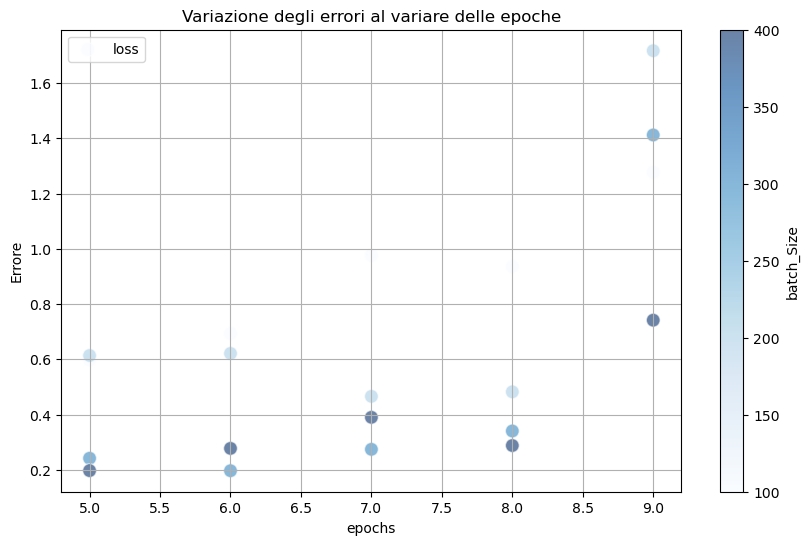

In [117]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], c=df_res['batch_size'], cmap='Blues', s=100, label='loss', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_error'], c=df_res['batch_size'], cmap='Blues', s=200, label='MAE', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], marker='o', label='MAPE')
#plt.scatter(df_res['epochs'], df_res['test_r2_score'], marker='o', label='R2')

cbar = plt.colorbar(scatter)
cbar.set_label('batch_Size')
plt.xlabel('epochs')
plt.ylabel('Errore')
plt.title('Variazione degli errori al variare delle epoche')
plt.legend()
 
plt.grid(True)
plt.show()